https://www.semanticscholar.org/reader/e81657338e48b233c8c6019832e6670fa552adb4

https://archive.ics.uci.edu/dataset/372/htru2

In [1]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import pandas as pd
from sklearn.decomposition import PCA
from factor_analyzer import Rotator
from sklearn.manifold import MDS

In [2]:
htru2 = fetch_ucirepo(id=372)

In [3]:
X = htru2.data.features
y = htru2.data.targets

In [4]:
len(X), len(y)

(17898, 17898)

In [5]:
print(htru2.metadata)
print(htru2.variables)

{'uci_id': 372, 'name': 'HTRU2', 'repository_url': 'https://archive.ics.uci.edu/dataset/372/htru2', 'data_url': 'https://archive.ics.uci.edu/static/public/372/data.csv', 'abstract': 'Pulsar candidates collected during the HTRU survey. Pulsars are a type of star, of considerable scientific interest. Candidates must be classified in to pulsar and non-pulsar classes to aid discovery.', 'area': 'Physics and Chemistry', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 17898, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5DK6R', 'creators': ['Robert Lyon'], 'intro_paper': {'ID': 460, 'type': 'NATIVE', 'title': 'Fifty years of pulsar candidate selection: from simple filters to a new principled real-time classification approach', 'a

In [6]:
hianyzo_ertekek = X.isnull().sum()
hianyzo_ertekek

Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
dtype: int64

In [7]:
X.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


In [8]:
oszlop_nevek_torleshez = ["DM_kurtosis", "Profile_kurtosis", "DM_mean", "Profile_skewness"]
for ont in oszlop_nevek_torleshez:
    sorted_data = np.sort(X[ont].unique())
    limit = np.percentile(sorted_data, 98)
    print(ont, len(X[X[ont] > limit]))
    index_to_drop = X[X[ont] > limit].index
    X = X.drop(index_to_drop)
    y = y.drop(index_to_drop)
    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)

DM_kurtosis 361
Profile_kurtosis 351
DM_mean 171
Profile_skewness 341


In [9]:
X.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
count,16674.000000,16674.000000,16674.000000,16674.000000,16674.000000,16674.000000,16674.000000,16674.000000
mean,114.327950,46.981739,0.296864,0.669693,8.744577,24.662084,8.395238,100.123550
std,19.568146,6.236921,0.513937,1.878356,20.587438,17.578888,3.781528,79.900706
min,20.789062,28.604826,-1.876011,-1.791886,0.581940,9.659661,-2.018626,-1.976976
25%,103.048828,42.932858,0.020747,-0.201204,1.936455,14.477830,6.246474,41.650666
50%,115.976562,47.205636,0.207861,0.164572,2.749164,18.164723,8.537848,85.459294
75%,127.537109,51.111637,0.435194,0.791658,4.731187,26.265528,10.662876,138.343742
max,192.617188,98.778911,3.410426,20.261566,153.959866,110.642211,19.663163,410.108786


In [10]:
feature_cimkek = list(X.columns)
print(feature_cimkek)

['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis']


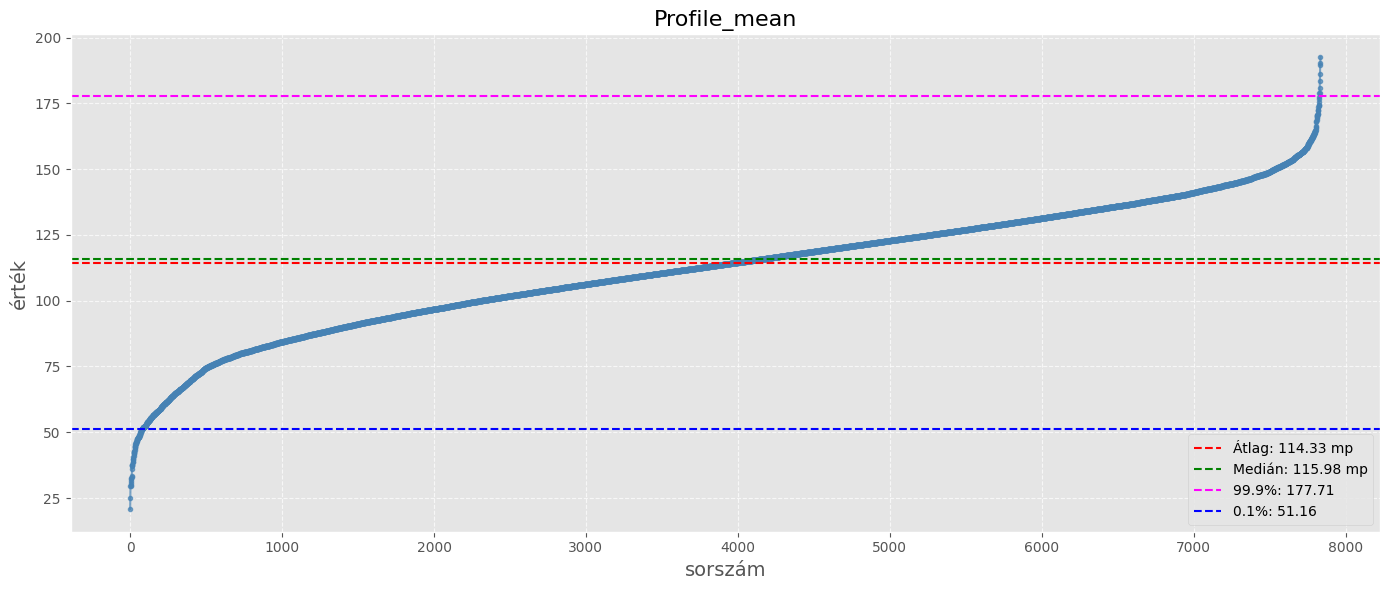

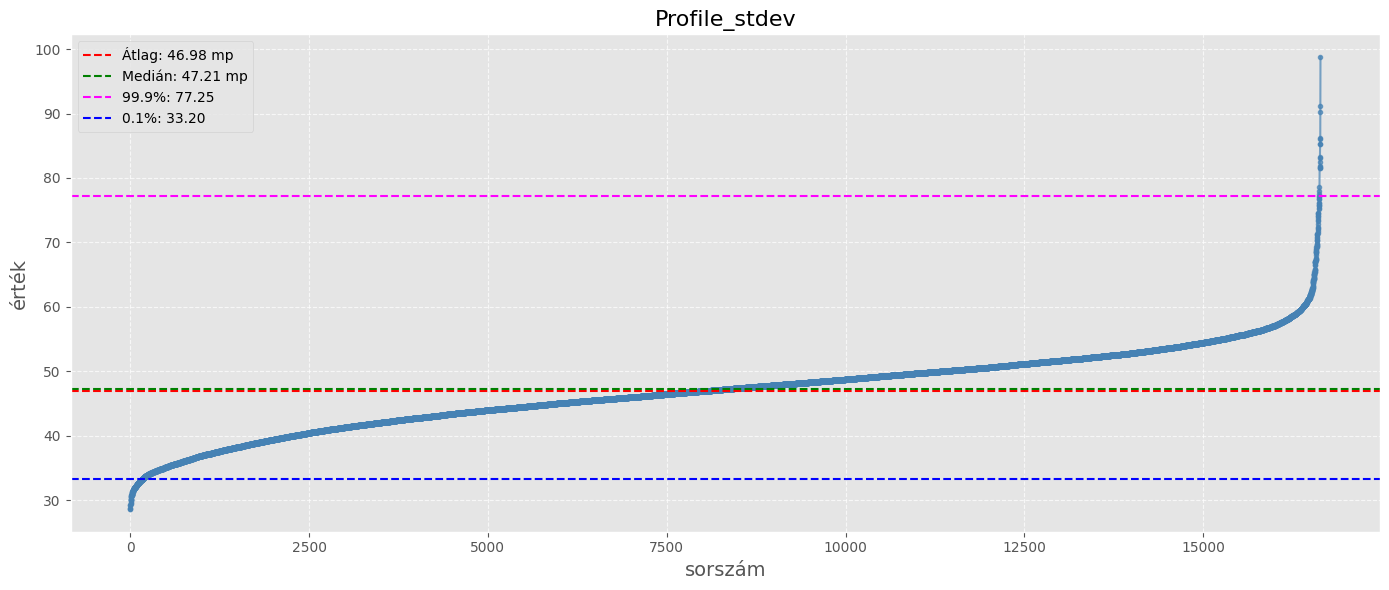

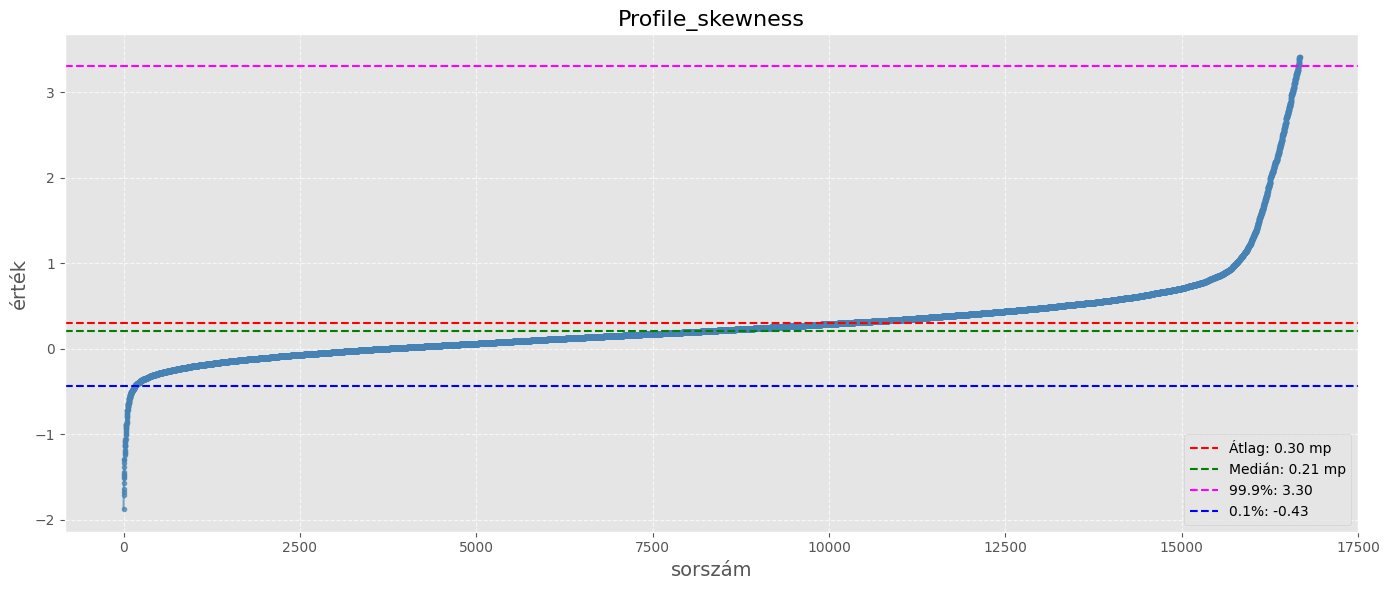

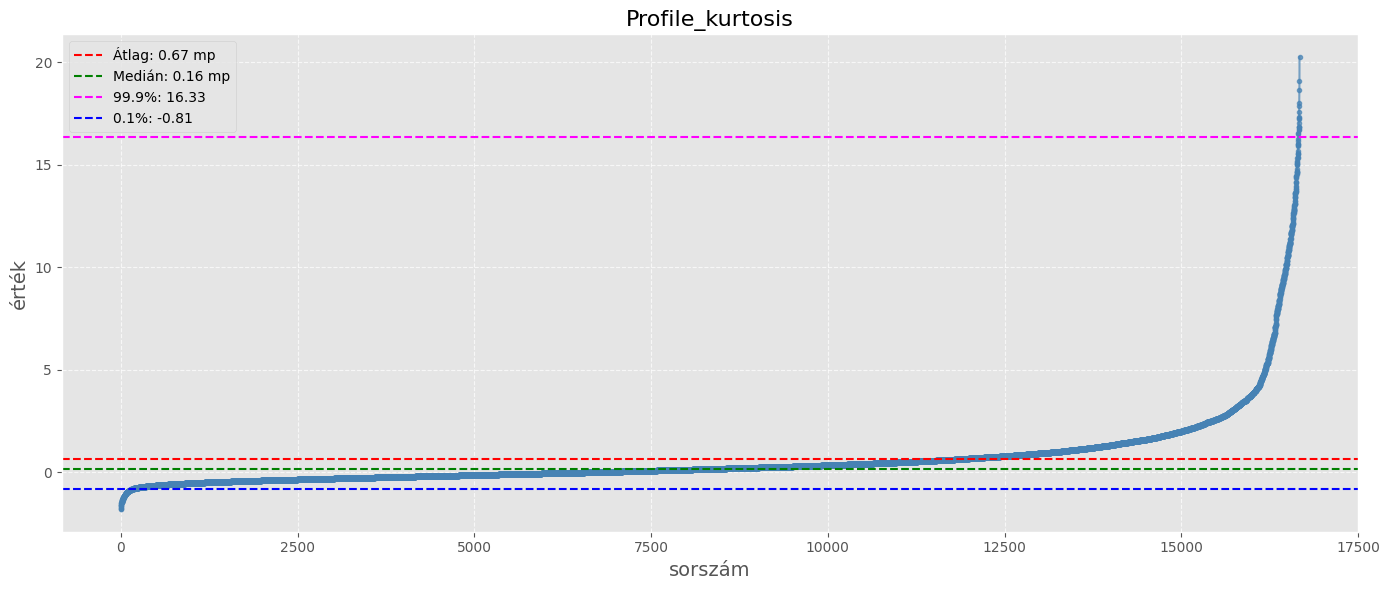

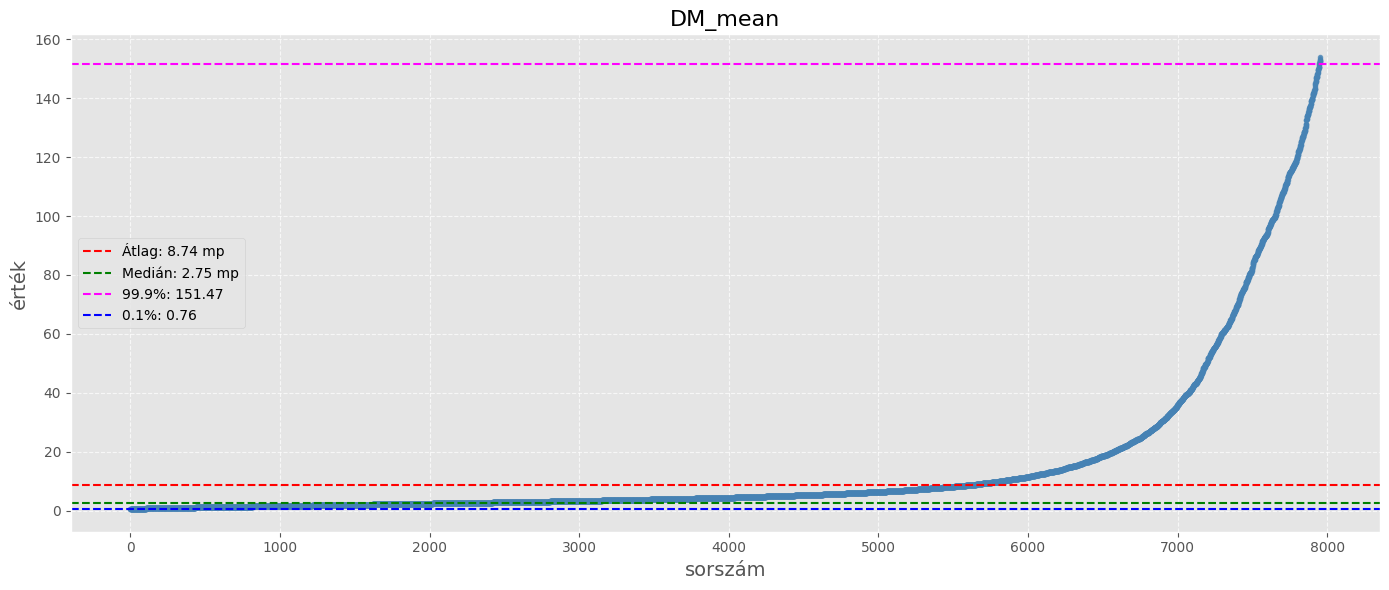

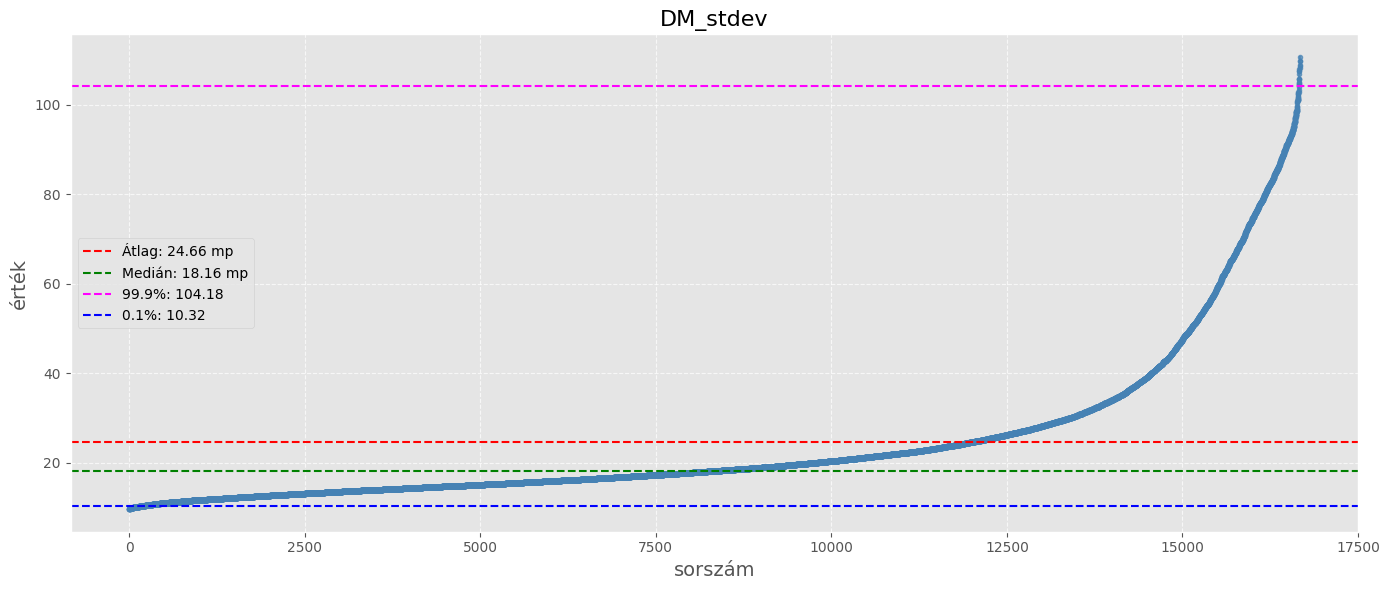

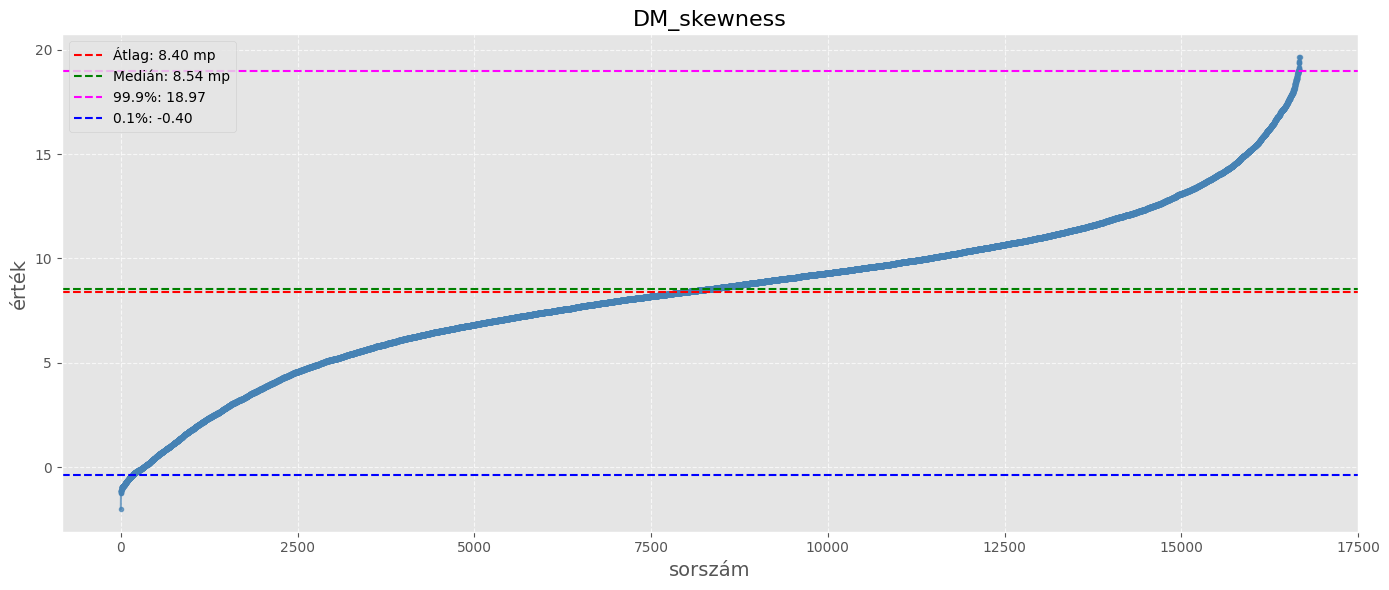

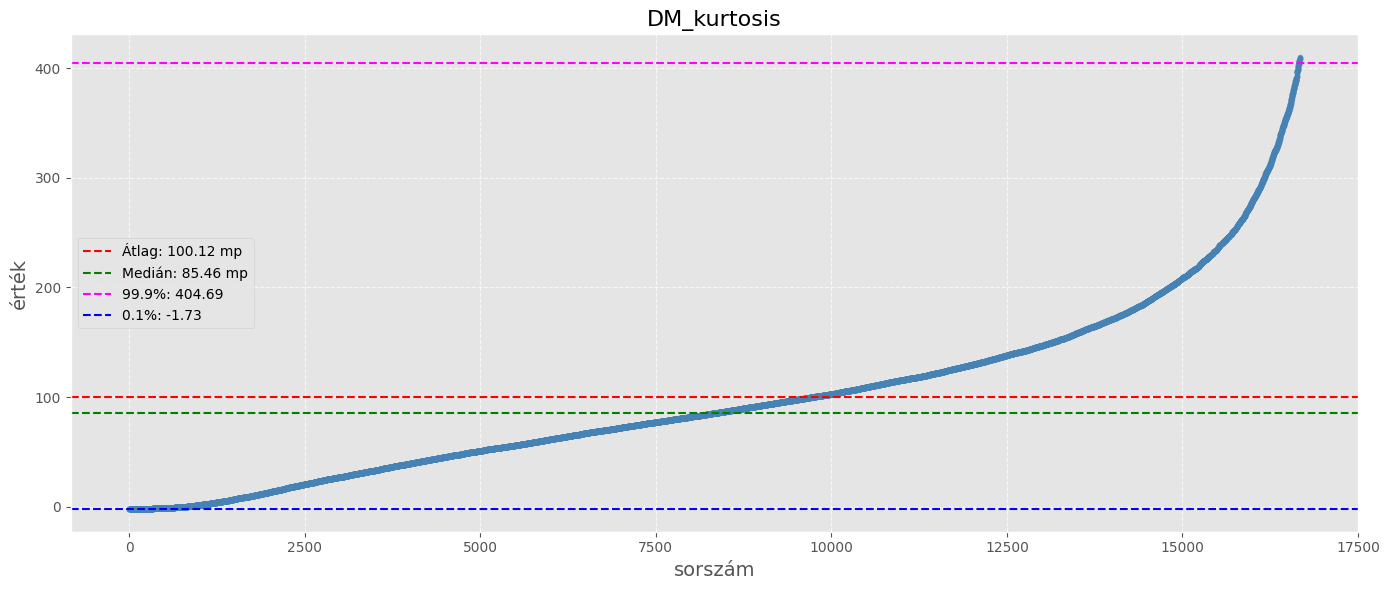

In [11]:
for adat in feature_cimkek:
    sorted_data = np.sort(X[adat].unique())
    sorted_data_999 = np.percentile(sorted_data, 99.9)
    sorted_data_01 = np.percentile(sorted_data, 1)
    plt.style.use('ggplot')
    plt.figure(figsize=(14, 6))
    plt.plot(range(len(sorted_data)), sorted_data, marker='o', linestyle='-', color='steelblue', alpha=0.7, markersize=3)
    plt.title(adat, fontsize=16)
    plt.xlabel('sorszám', fontsize=14)
    plt.ylabel('érték', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(y=X[adat].mean(), color='red', linestyle='--', label=f'Átlag: {X[adat].mean():.2f} mp')
    plt.axhline(y=X[adat].median(), color='green', linestyle='--', label=f'Medián: {X[adat].median():.2f} mp')
    plt.axhline(y=sorted_data_999, color='magenta', linestyle='--', label=f'99.9%: {sorted_data_999:.2f}')
    plt.axhline(y=sorted_data_01, color='blue', linestyle='--', label=f'0.1%: {sorted_data_01:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [12]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=feature_cimkek)

In [13]:
X_rbst = pd.DataFrame(RobustScaler().fit_transform(X), columns=feature_cimkek)

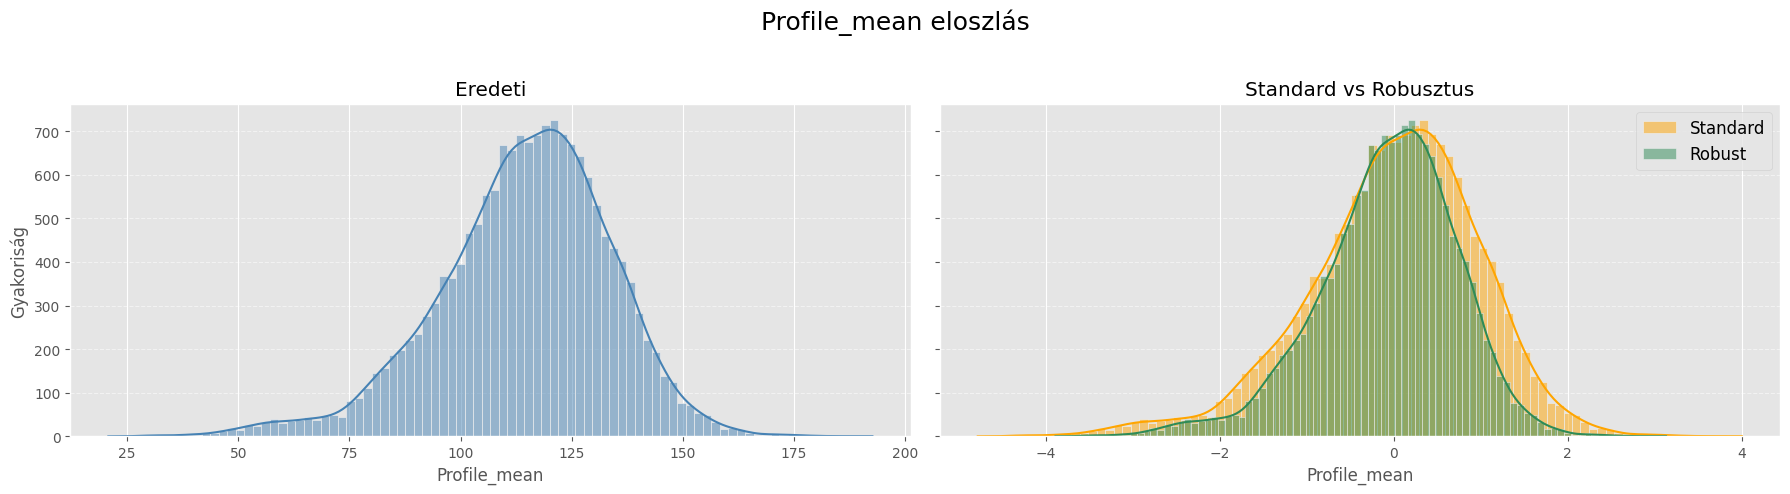

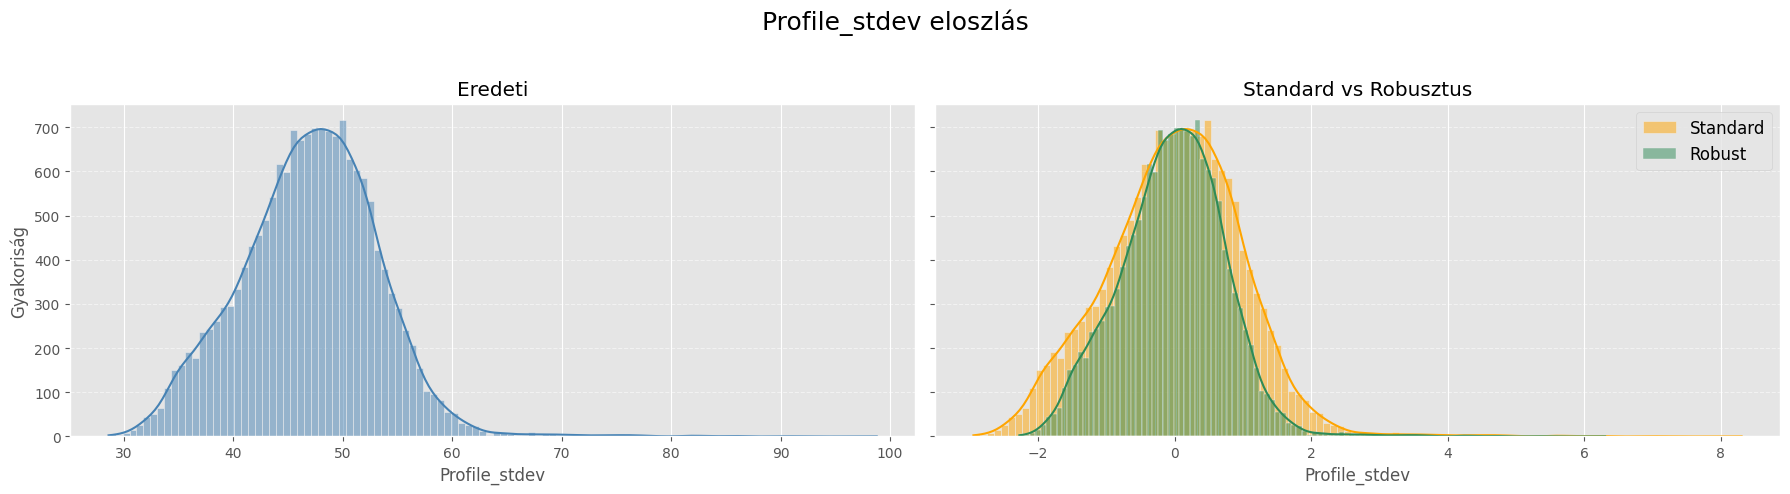

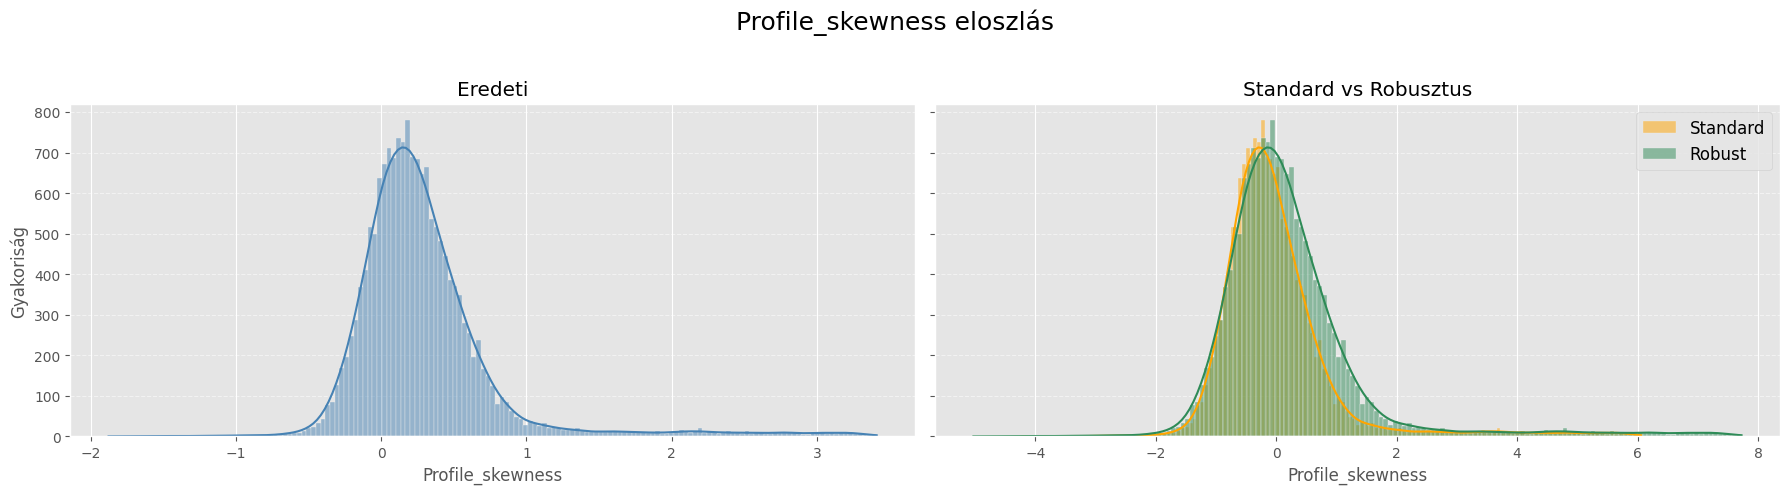

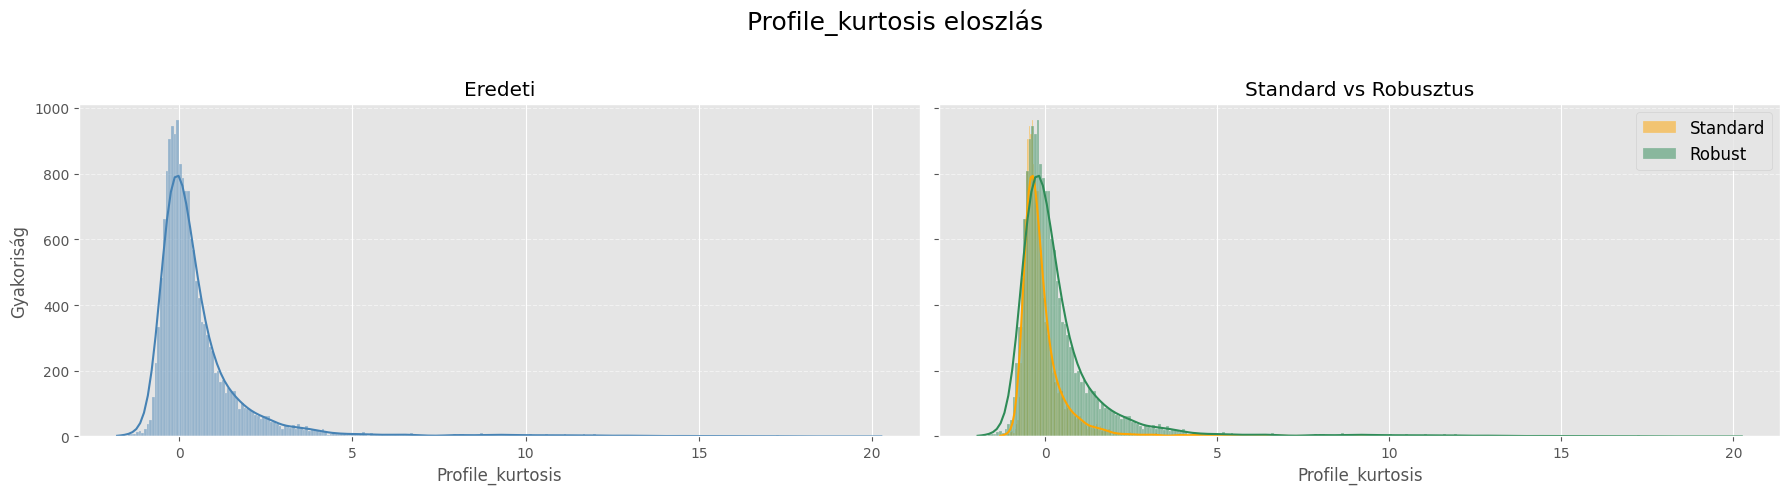

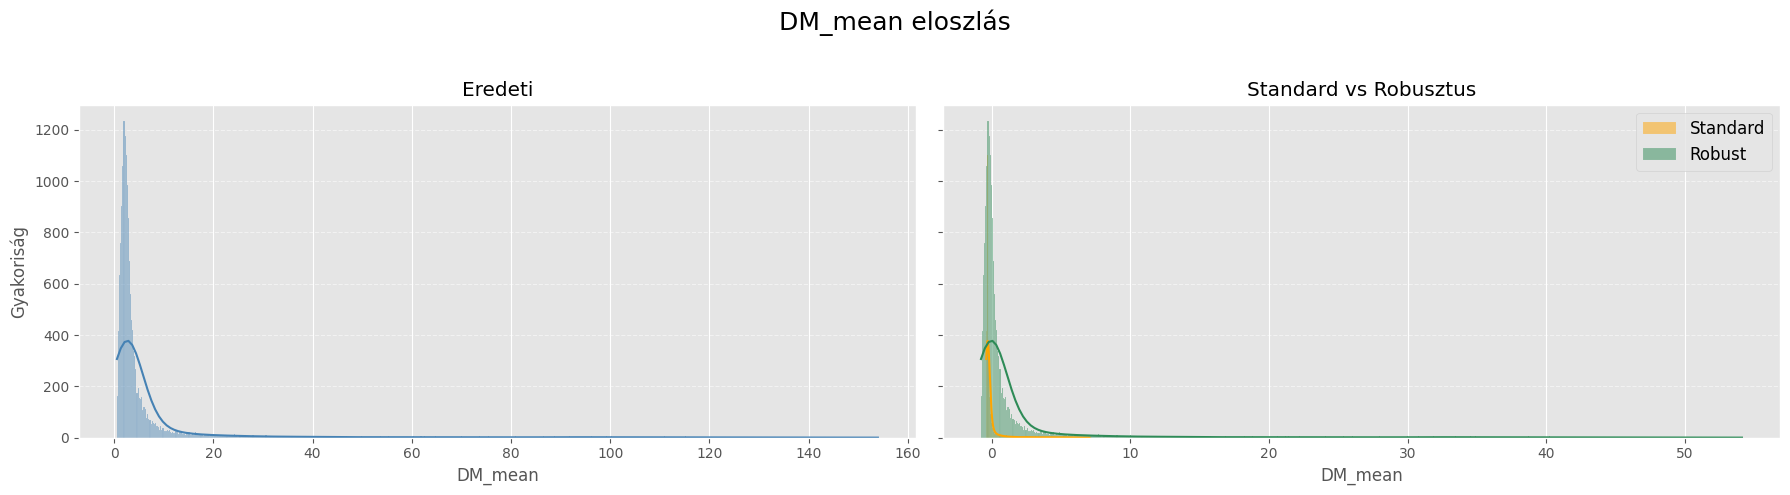

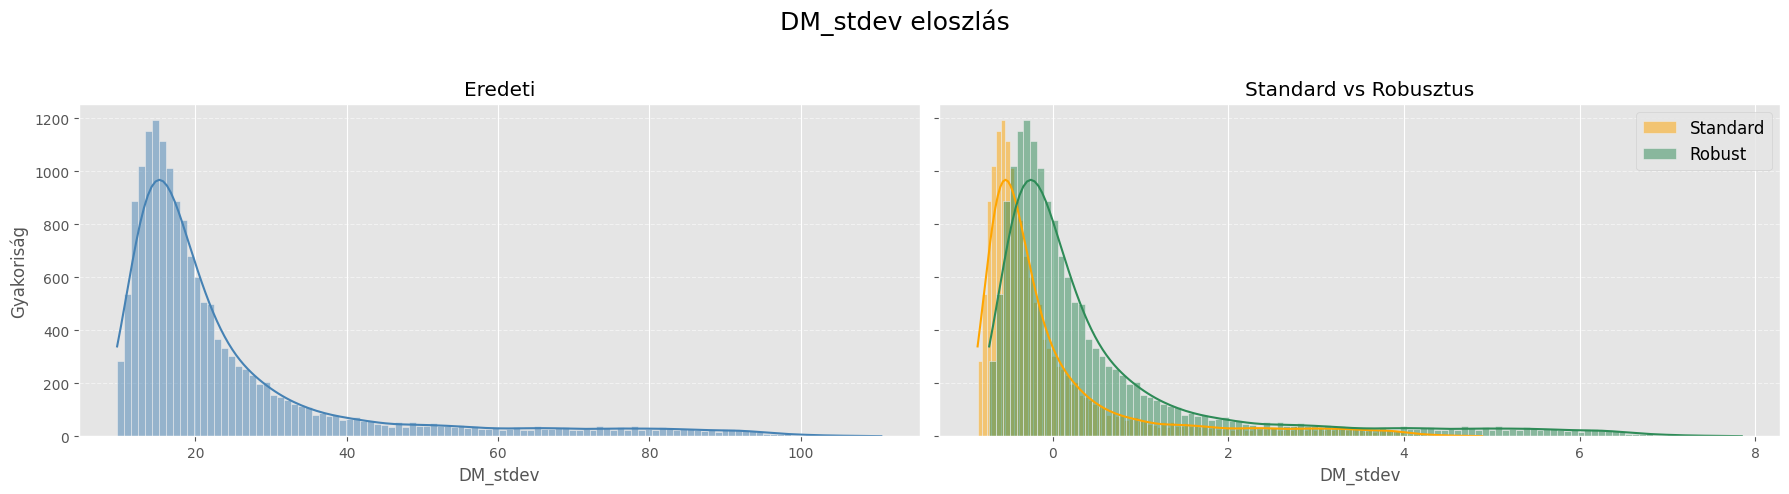

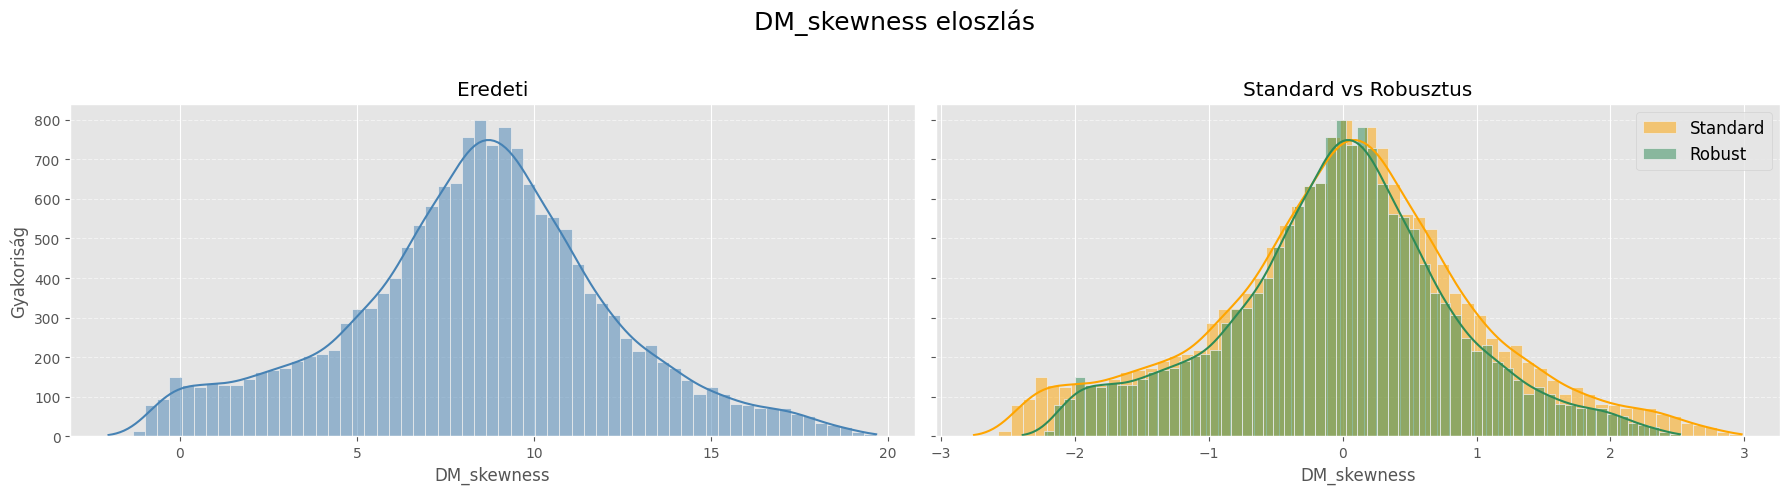

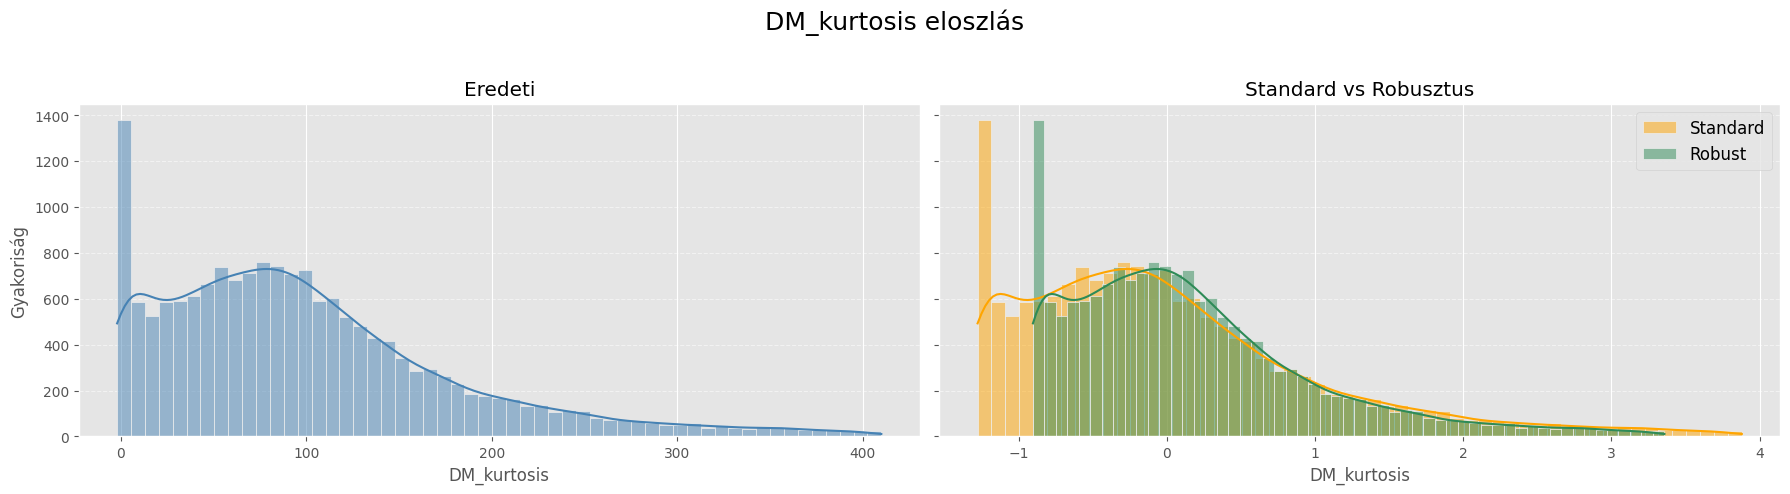

In [14]:
for adat in feature_cimkek:
    fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
    plt.suptitle(f'{adat} eloszlás', fontsize=18)
    sns.set_palette("muted")

    sns.histplot(data=X, x=adat, kde=True, color='steelblue', ax=axes[0])
    axes[0].set_title('Eredeti')
    axes[0].set_xlabel(adat)
    axes[0].set_ylabel('Gyakoriság')
    axes[0].grid(axis='y', linestyle='--', alpha=0.5)

    sns.histplot(data=X_std, x=adat, kde=True, color='orange', ax=axes[1], label='Standard')
    sns.histplot(data=X_rbst, x=adat, kde=True, color='seagreen', ax=axes[1], label='Robust', alpha=0.5)
    axes[1].set_title('Standard vs Robusztus')
    axes[1].set_xlabel(adat)
    axes[1].grid(axis='y', linestyle='--', alpha=0.5)

    plt.legend(fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

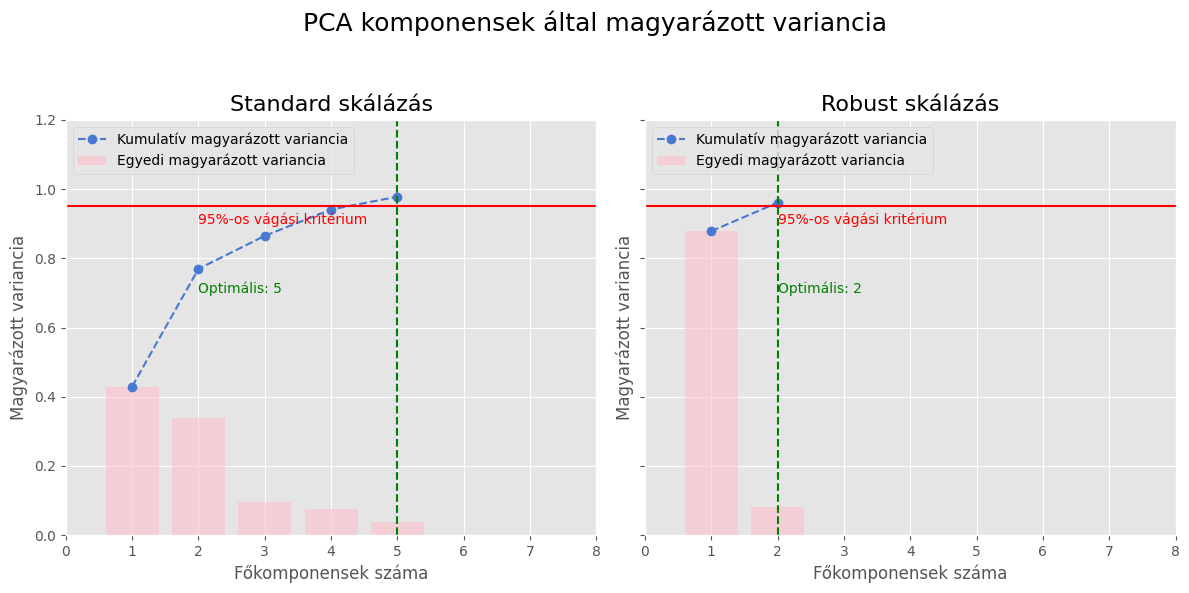

In [15]:
pca_results = {}

for tipus, adat in {"standard": X_std, "robust": X_rbst}.items():
    pca = PCA(n_components = 0.95, svd_solver = 'full')
    pca.fit(adat)

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = explained_variance_ratio.cumsum()
    optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance < 0.95]) + 1

    pca_results[tipus] = {
        "explained": explained_variance_ratio,
        "cumulative": cumulative_explained_variance,
        "optimal": optimal_num_components
    }

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plt.suptitle("PCA komponensek által magyarázott variancia", fontsize=18)

for ax, (tipus, results) in zip(axes, pca_results.items()):
    ax.bar(range(1, len(results["explained"]) + 1), results["explained"], alpha=0.6, color='pink', label='Egyedi magyarázott variancia')
    ax.plot(range(1, len(results["cumulative"]) + 1), results["cumulative"], marker='o', linestyle='--', label='Kumulatív magyarázott variancia')
    ax.set_title(f'{tipus.capitalize()} skálázás', fontsize=16)
    ax.set_xlabel('Főkomponensek száma')
    ax.set_ylabel('Magyarázott variancia')
    ax.axis([0, 8, 0, 1.2])
    ax.axhline(y=0.95, color='r', linestyle='-')
    ax.axvline(x=results["optimal"], color='g', linestyle='--')
    ax.text(2, 0.9, '95%-os vágási kritérium', color='red', fontsize=10)
    ax.text(2, 0.7, f'Optimális: {results["optimal"]}', color='green', fontsize=10)
    ax.grid(True)
    ax.legend(loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


In [16]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_rbst)
pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

rotator_vm = Rotator(method='varimax')
varimax_loadings = rotator_vm.fit_transform(pca_loadings)

rotator_ob = Rotator(method='oblimin')
oblimin_loadings = rotator_ob.fit_transform(pca_loadings)

pca_df = pd.DataFrame(pca_loadings, columns=[f'PCA PC {i+1}' for i in range(pca.n_components_)], index=feature_cimkek)
varimax_df = pd.DataFrame(varimax_loadings, columns=[f'Varimax PC {i+1}' for i in range(pca.n_components_)], index=feature_cimkek)
oblimin_df = pd.DataFrame(oblimin_loadings, columns=[f'Oblimin PC {i+1}' for i in range(pca.n_components_)], index=feature_cimkek)
combined_df = pd.concat([pca_df, varimax_df, oblimin_df], axis=1)

print("Főkomponensek töltősúlyai:")
print(combined_df)

Főkomponensek töltősúlyai:
                  PCA PC 1  PCA PC 2  Varimax PC 1  Varimax PC 2  \
Profile_mean     -0.060870 -0.614201     -0.073020     -0.612875   
Profile_stdev     0.102516 -0.480864      0.092974     -0.482800   
Profile_skewness  0.220311  1.129901      0.242640      1.125318   
Profile_kurtosis  0.289689  1.833401      0.325935      1.827305   
DM_mean           7.362678 -0.136811      7.358526     -0.282570   
DM_stdev          1.281086  0.134325      1.283495      0.108933   
DM_skewness      -0.550412 -0.077009     -0.551829     -0.066096   
DM_kurtosis      -0.349195 -0.070712     -0.350527     -0.063784   

                  Oblimin PC 1  Oblimin PC 2  
Profile_mean          0.036993     -0.621272  
Profile_stdev         0.178718     -0.483600  
Profile_skewness      0.039979      1.144932  
Profile_kurtosis     -0.002733      1.856525  
DM_mean               7.364060     -0.000797  
DM_stdev              1.256175      0.159520  
DM_skewness          -0.536639 

In [17]:
varimax_projection = pd.DataFrame(np.dot(X_rbst, varimax_loadings), columns = ['Varimax PC 1', 'Varimax PC 2'])
oblimin_projection = pd.DataFrame(np.dot(X_rbst, oblimin_loadings), columns = ['Oblimin PC 1', 'Oblimin PC 2'])
principal_df = pd.DataFrame(data = principal_components, columns = ['PCA PC 1', 'PCA PC 2'])
X_2dim_pca = pd.concat([principal_df, varimax_projection, oblimin_projection, y], axis = 1)
X_2dim_pca.head()

,PCA PC 1,PCA PC 2,Varimax PC 1,Varimax PC 2,Oblimin PC 1,Oblimin PC 2,class
0,-2.090582,-2.135093,0.880844,-3.928657,1.577803,-3.930363,0
1,-2.680169,-0.849868,-3.488377,-0.884356,-3.308952,-1.027198,0
2,-1.978090,0.777972,1.858379,2.756006,1.354315,2.852891,0
3,-1.862600,-1.869495,2.605084,-3.351566,3.188334,-3.281394,0
4,-2.978059,1.167346,-5.633618,3.800473,-6.278608,3.617359,0


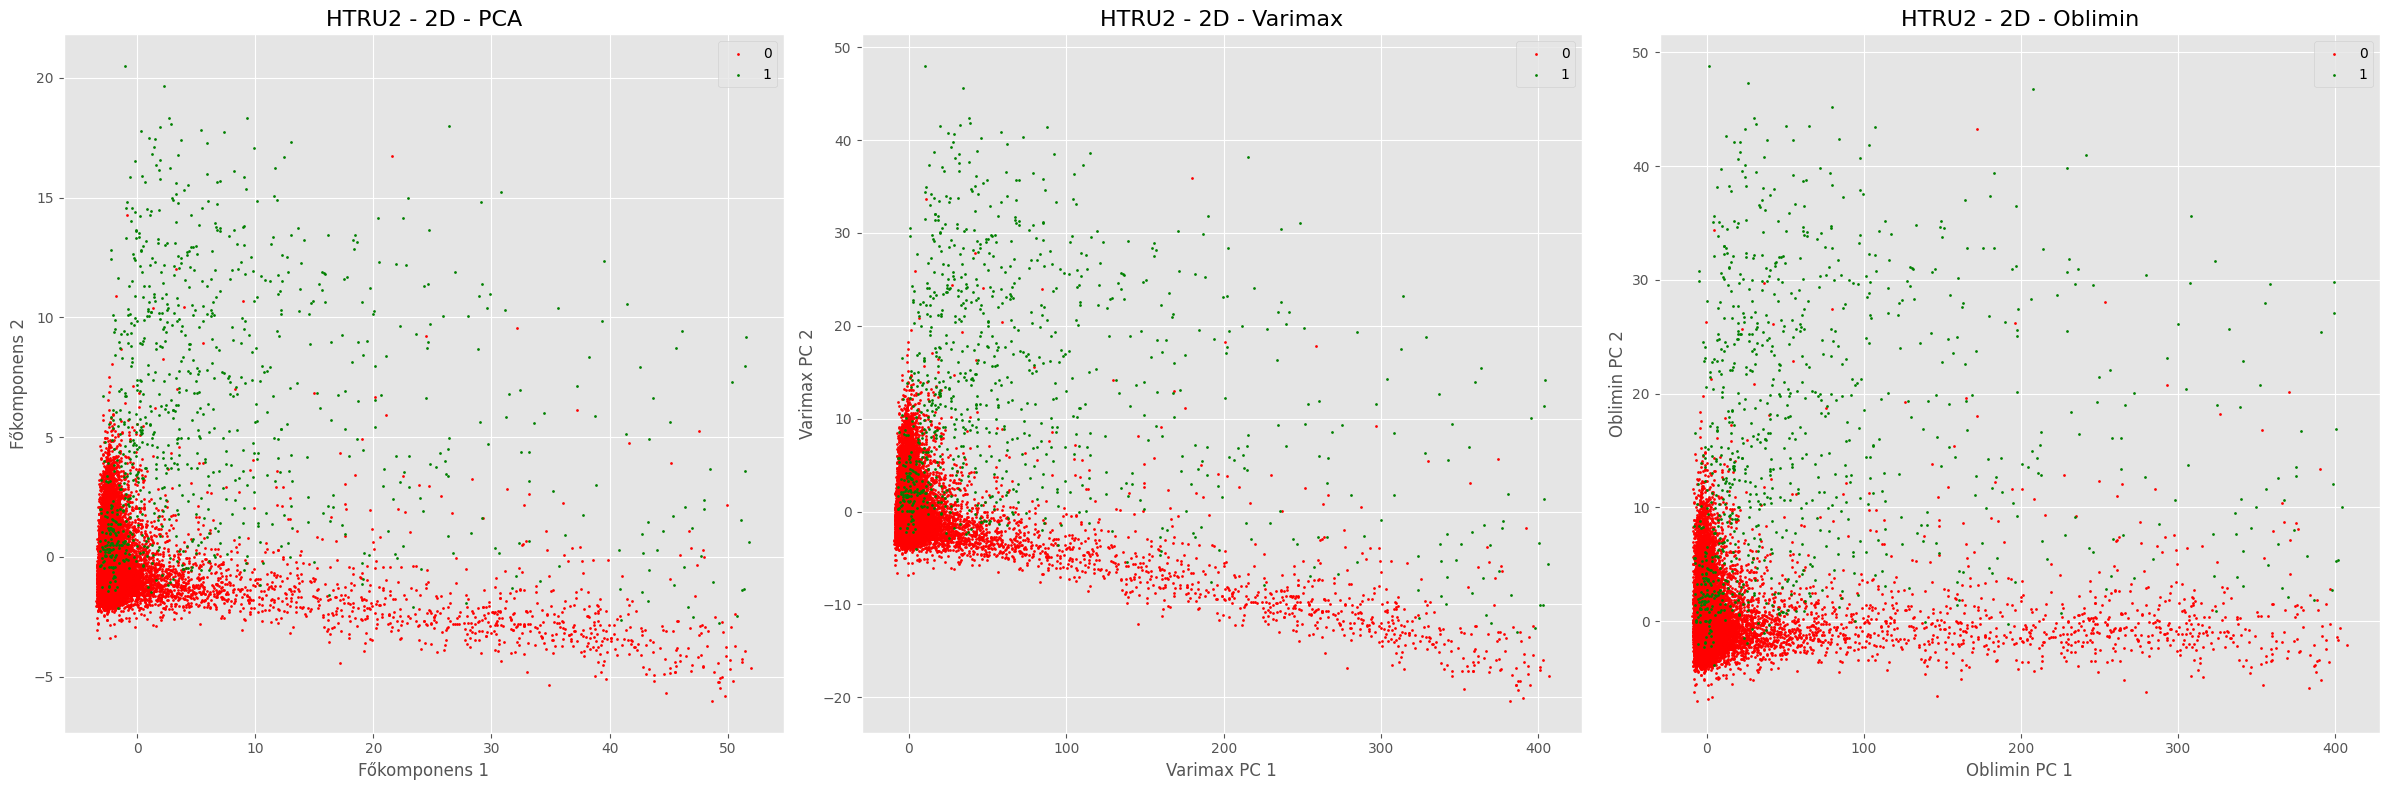

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
targets = [0, 1]
colors = ['r', 'g']

axes[0].set_title('HTRU2 - 2D - PCA', fontsize=16)
axes[0].set_xlabel('Főkomponens 1')
axes[0].set_ylabel('Főkomponens 2')
for target, color in zip(targets, colors):
    indicesToKeep = X_2dim_pca['class'] == target
    axes[0].scatter(X_2dim_pca.loc[indicesToKeep, 'PCA PC 1'],
                    X_2dim_pca.loc[indicesToKeep, 'PCA PC 2'],
                    c=color, s=2)
axes[0].legend(targets)

axes[1].set_title('HTRU2 - 2D - Varimax', fontsize=16)
axes[1].set_xlabel('Varimax PC 1')
axes[1].set_ylabel('Varimax PC 2')
for target, color in zip(targets, colors):
    indicesToKeep = X_2dim_pca['class'] == target
    axes[1].scatter(X_2dim_pca.loc[indicesToKeep, 'Varimax PC 1'],
                    X_2dim_pca.loc[indicesToKeep, 'Varimax PC 2'],
                    c=color, s=2)
axes[1].legend(targets)

axes[2].set_title('HTRU2 - 2D - Oblimin', fontsize=16)
axes[2].set_xlabel('Oblimin PC 1')
axes[2].set_ylabel('Oblimin PC 2')
for target, color in zip(targets, colors):
    indicesToKeep = X_2dim_pca['class'] == target
    axes[2].scatter(X_2dim_pca.loc[indicesToKeep, 'Oblimin PC 1'],
                    X_2dim_pca.loc[indicesToKeep, 'Oblimin PC 2'],
                    c=color, s=2)
axes[2].legend(targets)

plt.tight_layout()
plt.show()

In [19]:
mds = MDS(n_components=2, n_init=5, verbose=1, metric=False, max_iter=100)
X_mds_metric = mds.fit_transform(X)
X_std_mds_metric = mds.fit_transform(X_std)
X_rbst_mds_metric = mds.fit_transform(X_rbst)

breaking at iteration 1 with stress 0.30213609364696115
breaking at iteration 1 with stress 0.3022598609818386
breaking at iteration 1 with stress 0.30223860980213524
breaking at iteration 1 with stress 0.302360659968453
breaking at iteration 1 with stress 0.30231181939893675
breaking at iteration 1 with stress 0.3022652760871287
breaking at iteration 1 with stress 0.3021493202721459
breaking at iteration 1 with stress 0.3024317588768386
breaking at iteration 1 with stress 0.3021883806241838
breaking at iteration 1 with stress 0.3022776300446977
breaking at iteration 1 with stress 0.302129521713514
breaking at iteration 1 with stress 0.3024245841057251
breaking at iteration 1 with stress 0.3023051227171767
breaking at iteration 1 with stress 0.3020685310137836
breaking at iteration 1 with stress 0.3021964307056293
